In [84]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [85]:
!ls /content/gdrive/My\ Drive/MLProjects

stock-price-predictions  yolo


In [86]:
%cd /content/gdrive/My\ Drive/MLProjects

/content/gdrive/My Drive/MLProjects


In [87]:
!mkdir stock-price-predictions

mkdir: cannot create directory ‘stock-price-predictions’: File exists


In [88]:
%cd stock-price-predictions/

/content/gdrive/My Drive/MLProjects/stock-price-predictions


In [0]:
import pandas as pd
## For TCS stock prices
dataset = pd.read_csv('GOOG.csv', index_col='Date',parse_dates=True) 



In [90]:
dataset.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [91]:
dataset.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-15,571.371277,573.375793,566.654236,571.530884,571.530884,1597500
2014-09-16,571.191772,579.907837,571.092041,578.362122,578.362122,1480300
2014-09-17,578.421936,585.911377,577.190308,583.168884,583.168884,1692800
2014-09-18,585.392822,587.925842,583.398254,587.656616,587.656616,1444500
2014-09-19,589.880493,594.846863,587.885986,594.447937,594.447937,3736600
2014-09-22,592.194153,592.322754,581.862488,585.761780,585.761780,1689500
2014-09-23,585.243225,585.243225,579.409241,579.538879,579.538879,1471400
2014-09-24,579.867981,588.015625,578.930542,586.380066,586.380066,1728100
2014-09-25,585.941284,586.370117,572.607910,573.485474,573.485474,1925900


In [92]:
#Data Cleaning
dataset.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

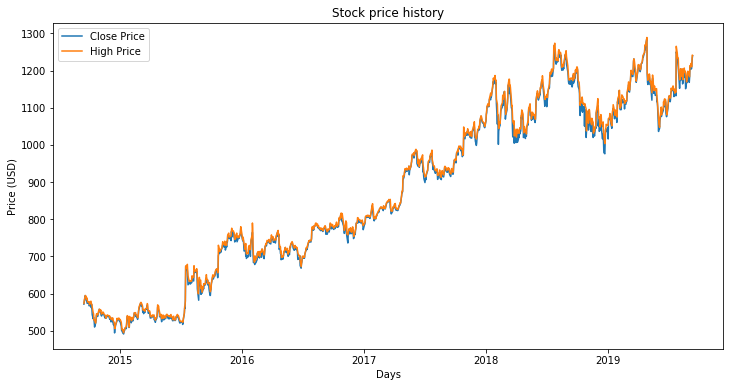

In [93]:
###
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,6))
plt.plot(dataset['Close'])
plt.plot(dataset['High'])

plt.title('Stock price history')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Close Price', 'High Price'],loc='upper left')
plt.show()

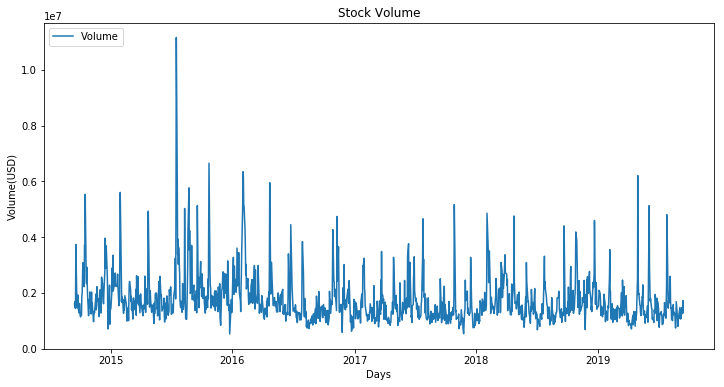

In [94]:
plt.figure(figsize=(12,6))
plt.plot(dataset['Volume'])
plt.title('Stock Volume')
plt.ylabel('Volume(USD)')
plt.xlabel('Days')
plt.legend(['Volume'], loc='upper left')
plt.show()

In [95]:
from sklearn.model_selection import train_test_split
training_cols = ['Open','High','Low','Close','Adj Close','Volume']
df_train, df_test = train_test_split(dataset,train_size=0.8, test_size=0.2, shuffle=False)
print("Train size = {}, Test size = {}".format(len(df_train), len(df_test)))


Train size = 1007, Test size = 252


In [96]:
df_train.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-15,571.371277,573.375793,566.654236,571.530884,571.530884,1597500
2014-09-16,571.191772,579.907837,571.092041,578.362122,578.362122,1480300
2014-09-17,578.421936,585.911377,577.190308,583.168884,583.168884,1692800
2014-09-18,585.392822,587.925842,583.398254,587.656616,587.656616,1444500
2014-09-19,589.880493,594.846863,587.885986,594.447937,594.447937,3736600
2014-09-22,592.194153,592.322754,581.862488,585.761780,585.761780,1689500
2014-09-23,585.243225,585.243225,579.409241,579.538879,579.538879,1471400
2014-09-24,579.867981,588.015625,578.930542,586.380066,586.380066,1728100
2014-09-25,585.941284,586.370117,572.607910,573.485474,573.485474,1925900


In [97]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1007 entries, 2014-09-15 to 2018-09-12
Data columns (total 6 columns):
Open         1007 non-null float64
High         1007 non-null float64
Low          1007 non-null float64
Close        1007 non-null float64
Adj Close    1007 non-null float64
Volume       1007 non-null int64
dtypes: float64(5), int64(1)
memory usage: 55.1 KB


In [98]:
df_train.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1.007000e+03
mean,803.837506,810.323620,797.086827,803.977089,803.977089,1.782700e+06
std,204.453933,206.299585,202.966986,204.795342,204.795342,8.868847e+05
min,493.295654,494.618011,486.225067,491.201416,491.201416,5.272000e+05
25%,639.890015,645.684509,632.200012,641.914978,641.914978,1.256650e+06
50%,770.580017,775.840027,766.614990,771.000000,771.000000,1.565300e+06
75%,959.309998,969.474976,952.855011,962.154998,962.154998,2.040350e+06
max,1271.000000,1273.890015,1249.020020,1268.329956,1268.329956,1.116490e+07


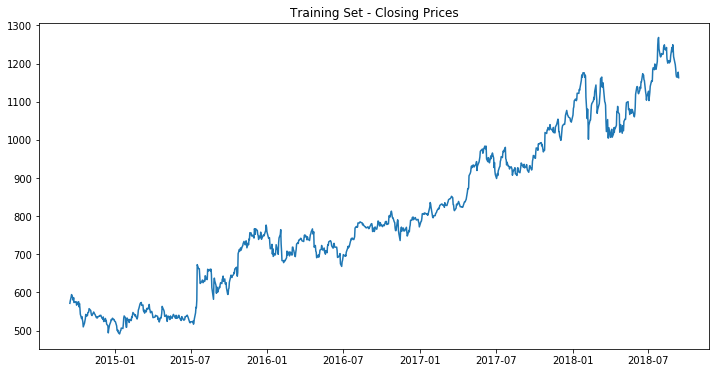

In [99]:
plt.figure(figsize=(12,6))
plt.plot(df_train['Close'])
plt.title('Training Set - Closing Prices')
plt.show()

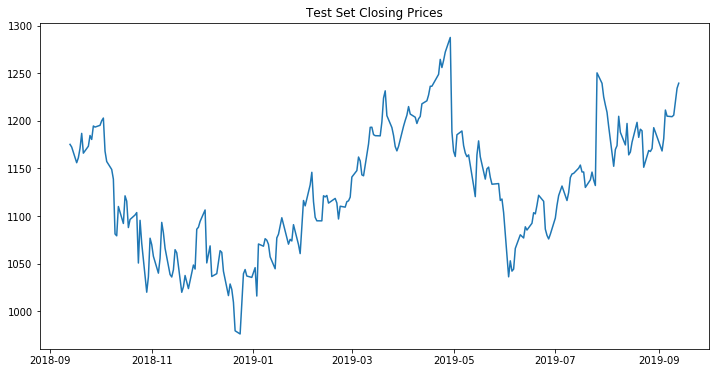

In [100]:
plt.figure(figsize=(12,6))
plt.plot(df_test['Close'])
plt.title('Test Set Closing Prices')
plt.show()

In [101]:
df_test.shape

(252, 6)

In [0]:
#Fature Scaling Normalization
from sklearn.preprocessing import MinMaxScaler


sc = MinMaxScaler(feature_range=(0,1))
sc_y = MinMaxScaler(feature_range=(0,1))


In [0]:
x = df_train.loc[:,training_cols].values
y_train = df_train.loc[:,['Close']].values
y_train = sc_y.fit_transform(y_train)
x_train = sc.fit_transform(x)
x_test = sc.transform(df_test.loc[:,training_cols])

In [104]:
x.shape

(1007, 6)

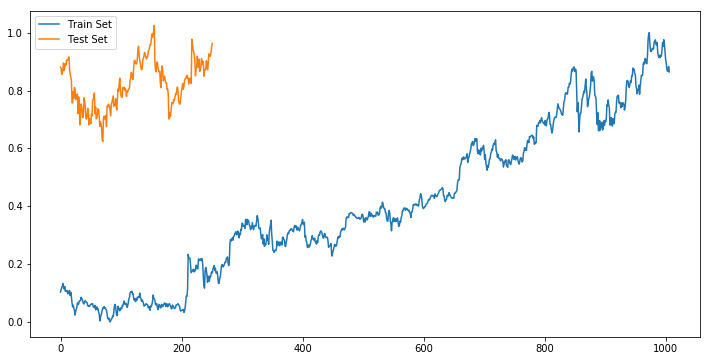

In [105]:
plt.figure(figsize=(12,6))
plt.plot(x_train[:,3])
plt.plot(x_test[:,3])
plt.legend(['Train Set','Test Set'])

In [106]:
x_train.shape

(1007, 6)

In [107]:
x_test.shape

(252, 6)

In [0]:
from tqdm import tqdm_notebook
TIME_STEPS = 60
def build_timeseries(mat, y_col_index):
    # y_col_index is the index of column that would act as output column
    # total number of time-series samples would be len(mat) - TIME_STEPS
    dim_0 = mat.shape[0] - TIME_STEPS
    dim_1 = mat.shape[1]
    x = np.zeros((dim_0, TIME_STEPS, dim_1))
    y = np.zeros((dim_0,))
    
    for i in tqdm_notebook(range(dim_0)):
        x[i] = mat[i:TIME_STEPS+i]
        y[i] = mat[TIME_STEPS+i, y_col_index]
    print("length of time-series i/o",x.shape,y.shape)
    return x, y

In [0]:
def trim_dataset(mat, batch_size):
    """
    trims dataset to a size that's divisible by BATCH_SIZE
    """
    no_of_rows_drop = mat.shape[0]%batch_size
    if(no_of_rows_drop > 0):
        return mat[:-no_of_rows_drop]
    else:
        return mat

In [110]:
import numpy as np
BATCH_SIZE = 32
x_t, y_t = build_timeseries(x_train, 3)
x_t = trim_dataset(x_t, BATCH_SIZE)
y_t = trim_dataset(y_t, BATCH_SIZE)
x_temp, y_temp = build_timeseries(x_test, 3)
x_temp = trim_dataset(x_temp, BATCH_SIZE)
y_temp = trim_dataset(y_temp,BATCH_SIZE)
x_val, x_test_t = np.split(trim_dataset(x_temp, BATCH_SIZE),2)
y_val, y_test_t = np.split(trim_dataset(y_temp, BATCH_SIZE),2)
x_test_t = trim_dataset(x_test_t, BATCH_SIZE)
y_test_t = trim_dataset(y_test_t, BATCH_SIZE)

#x_test_t, y_test_t = build_timeseries(x_test, 3)
#x_test_t = trim_dataset(x_test_t, BATCH_SIZE)
#y_test_t = trim_dataset(y_test_t,BATCH_SIZE)




length of time-series i/o (947, 60, 6) (947,)



length of time-series i/o (192, 60, 6) (192,)


In [0]:
#Creating model
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from keras.optimizers import RMSprop
from keras.callbacks import CSVLogger

In [0]:
BATCH_SIZE=32
TIME_STEPS=60
model = Sequential()
model.add(LSTM(100, batch_input_shape=(BATCH_SIZE, TIME_STEPS, x_t.shape[2]), dropout=0.0, recurrent_dropout=0.0, stateful=True,     kernel_initializer='random_uniform'))
model.add(Dropout(0.5))
model.add(Dense(50,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
optimizer = RMSprop(lr=0.001)
model.compile(loss='mean_squared_error', optimizer=optimizer)


In [113]:
import os
OUTPUT_PATH='.'
csv_logger = CSVLogger(os.path.join(OUTPUT_PATH, 'stock-price-prediction' + '.log'), append=True)

history = model.fit(x_t, y_t, epochs=50, verbose=1, batch_size=BATCH_SIZE,
                    shuffle=False, validation_data=(trim_dataset(x_val, BATCH_SIZE),
                    trim_dataset(y_val, BATCH_SIZE)), callbacks=[csv_logger])


Train on 928 samples, validate on 96 samples
Epoch 1/50
928/928 [==============================] - 4s 5ms/step - loss: 0.0329 - val_loss: 0.0172
Epoch 2/50
928/928 [==============================] - 3s 3ms/step - loss: 0.0410 - val_loss: 0.0127
Epoch 3/50
928/928 [==============================] - 3s 3ms/step - loss: 0.0126 - val_loss: 0.0155
Epoch 4/50
928/928 [==============================] - 3s 3ms/step - loss: 0.0094 - val_loss: 0.0131
Epoch 5/50
928/928 [==============================] - 3s 3ms/step - loss: 0.0077 - val_loss: 0.0144
Epoch 6/50
928/928 [==============================] - 3s 3ms/step - loss: 0.0062 - val_loss: 0.0104
Epoch 7/50
928/928 [==============================] - 3s 3ms/step - loss: 0.0054 - val_loss: 0.0167
Epoch 8/50
928/928 [==============================] - 3s 3ms/step - loss: 0.0058 - val_loss: 0.0153
Epoch 9/50
928/928 [==============================] - 3s 3ms/step - loss: 0.0051 - val_loss: 0.0112
Epoch 10/50
928/928 [==============================] - 

# New Section

In [0]:
model.save('GOOG-Stock-price-model.h5')

In [0]:
model.load_weights('GOOG-Stock-price-model.h5')
#model.load_weights()
predicted_stock_price = model.predict(x_test_t)


In [116]:
predicted_stock_price.shape

(96, 1)

In [117]:
y_test_t.shape

(96,)

In [0]:
y_test_t = y_test_t.reshape(y_test_t.shape[0],1)

In [0]:
#predicted_stock_price.shape
predicted_stock_price = sc_y.inverse_transform(predicted_stock_price)
y_test_t = sc_y.inverse_transform(y_test_t)

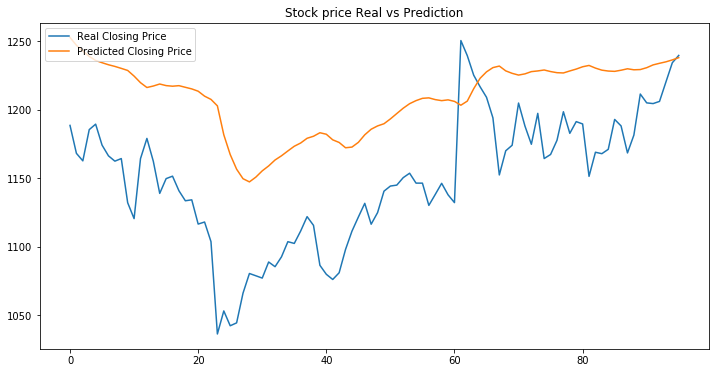

In [120]:
plt.figure(figsize=(12,6))
plt.plot(y_test_t)
plt.plot(predicted_stock_price)
#plt.plot(predicted_stock_price)
plt.title('Stock price Real vs Prediction')
#plt.ylabel('Price (INR)')
#plt.xlabel('Days')
plt.legend(['Real Closing Price','Predicted Closing Price'],loc='upper left')
plt.show()


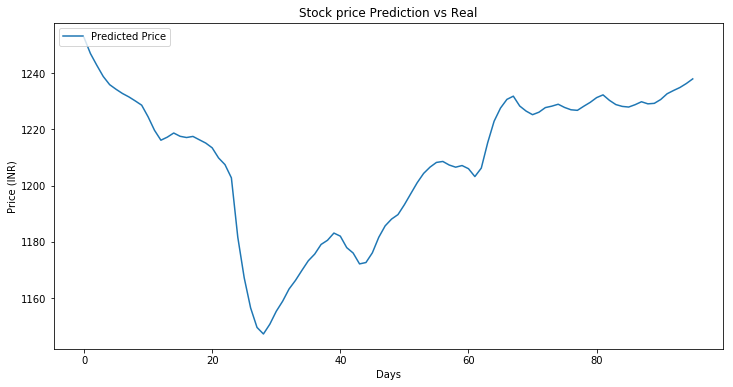

In [121]:
plt.figure(figsize=(12,6))
#plt.plot(dataset['Close Price'])
plt.plot(predicted_stock_price)
plt.title('Stock price Prediction vs Real')
plt.ylabel('Price (INR)')
plt.xlabel('Days')
plt.legend(['Predicted Price'],loc='upper left')
plt.show()

